In [5]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

C:\Users\yoder\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
model = InceptionV3(weights='imagenet')

96116736/96112376 [==============================] - 26s 0us/step


In [7]:
img = image.load_img('../images/mouse.jpg')

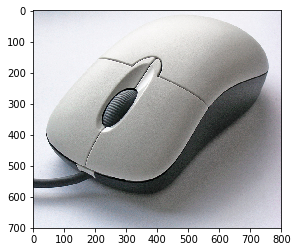

In [8]:
plt.imshow(img)

In [5]:
x = image.img_to_array(img)

In [6]:
x = np.expand_dims(x,axis=0)

In [7]:
x.shape

(1, 701, 800, 3)

In [8]:
x.max()

255.0

In [9]:
x = preprocess_input(x)

In [10]:
x.max()

1.0

In [11]:
y = model.predict(x)

In [12]:
df = pd.DataFrame(decode_predictions(y,top=5)[0])
df = df.drop(0,axis=1).round(2)
df

40960/35363 [==================================] - 0s 1us/step


,1,2
0,mouse,0.11
1,vacuum,0.00
2,remote_control,0.00
3,joystick,0.00
4,microphone,0.00


In [13]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (